## 筛选出速度在13-17节的所有天数

In [1]:
import pandas as pd
import numpy as np



In [2]:
df_ais = pd.read_csv('../processed/AIS_hour_R_added.csv')
df_ais = df_ais.drop("Unnamed: 0", axis=1)
df_ais['postime'] = pd.to_datetime(df_ais['postime'],format='ISO8601')

df_collection = df_ais[(df_ais['SOG']<13) | (df_ais['SOG']>17)]

years = df_collection['postime'].dt.year
months = df_collection['postime'].dt.month
days = df_collection['postime'].dt.day
nums = df_collection['num']

new = pd.DataFrame(data=(years))
new = new.rename(columns={'postime': 'year'})

new2 = pd.DataFrame(data=(months))
new2 = new2.rename(columns={'postime': 'month'})

new3 = pd.DataFrame(data=(days))
new3 = new3.rename(columns={'postime': 'day'})

new4 = pd.DataFrame(data=(nums))
# new4 = new4.rename(columns={'postime': 'day'})

df_index = pd.concat([new, new2, new3, new4],  axis=1).reset_index(drop=True)
df_index = df_index.drop_duplicates(keep='first').reset_index(drop=True)


years = df_index['year']
months = df_index['month']
days = df_index['day']
nums = df_index['num']

df_index

,year,month,day,num
0,2021,1,4,1
1,2021,1,6,1
2,2021,1,10,1
3,2021,1,12,1
4,2021,1,28,1
...,...,...,...,...
4879,2024,11,20,13
4880,2024,11,21,13
4881,2024,11,22,13
4882,2024,11,28,13


In [3]:
df_processed = pd.DataFrame(data=None,columns=['SOG','heading','draught', 'wind_val', 'wind_direction', 
                                               'wave_val', 'wave_direction', 'stream_val', 'stream_direction', 'postime', 'num', 'Pe', 'R_total', 'R_calm', 'R_added'])
df_processed = df_ais
for i in range(years.shape[0]):
    df_processed =df_processed.drop(df_processed[(df_processed['postime'].dt.year == years[i]) & (df_processed['postime'].dt.month == months[i]) &
                                                  (df_processed['postime'].dt.day == days[i]) & (df_processed['num'] == nums[i])].index)


df_processed

,SOG,heading,draught,wind_val,wind_direction,wave_val,wave_direction,stream_val,stream_direction,postime,num,Pe,R_total,R_calm,R_added
23,13.150000,27.000000,13.3,11.170000,42.000000,3.070000,37.000000,0.740000,231.000000,2021-01-05 00:00:00,1,9777.85875,1314.160563,812.977558,501.183005
24,13.550000,27.000000,13.3,11.170000,41.500000,3.090000,37.500000,0.720000,232.000000,2021-01-05 01:00:00,1,9777.85875,1282.735513,853.643322,429.092191
25,13.466667,27.000000,13.3,11.020000,38.000000,3.060000,36.000000,0.670000,239.000000,2021-01-05 02:00:00,1,9777.85875,1304.506673,825.081917,479.424756
26,13.566667,28.000000,13.3,11.270000,37.000000,3.160000,37.000000,0.650000,240.000000,2021-01-05 03:00:00,1,9777.85875,1298.533422,832.738705,465.794717
27,13.466667,28.000000,13.3,11.213333,37.666667,3.236667,38.000000,0.580000,245.000000,2021-01-05 04:00:00,1,9777.85875,1323.037564,802.124542,520.913022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130262,16.062500,31.000000,13.3,2.695000,34.750000,0.568750,14.250000,0.205000,145.375000,2024-11-15 19:00:00,13,11117.32875,1331.870419,1030.535454,301.334966
130263,15.850000,34.800000,13.3,3.600000,47.000000,0.750000,20.000000,0.300000,39.000000,2024-11-15 20:00:00,13,11117.32875,1415.490721,907.585146,507.905575
130264,16.111111,32.888889,13.3,3.623333,46.000000,0.735556,21.000000,0.500000,66.777778,2024-11-15 21:00:00,13,11117.32875,1412.173430,911.972985,500.200445
130265,16.600000,35.333333,13.3,1.644444,19.555556,0.324444,9.333333,0.355556,32.888889,2024-11-15 22:00:00,13,11117.32875,1358.454252,988.058140,370.396112


,SOG,heading,draught,wind_val,wind_direction,wave_val,wave_direction,stream_val,stream_direction,postime,num,Pe,R_total,R_calm,R_added
0,13.150000,27.000000,13.3,11.170000,42.000000,3.070000,37.000000,0.740000,231.000000,2021-01-05 00:00:00,1,9777.85875,1314.160563,812.977558,501.183005
1,13.550000,27.000000,13.3,11.170000,41.500000,3.090000,37.500000,0.720000,232.000000,2021-01-05 01:00:00,1,9777.85875,1282.735513,853.643322,429.092191
2,13.466667,27.000000,13.3,11.020000,38.000000,3.060000,36.000000,0.670000,239.000000,2021-01-05 02:00:00,1,9777.85875,1304.506673,825.081917,479.424756
3,13.566667,28.000000,13.3,11.270000,37.000000,3.160000,37.000000,0.650000,240.000000,2021-01-05 03:00:00,1,9777.85875,1298.533422,832.738705,465.794717
5,13.766667,30.000000,13.3,11.003333,34.666667,3.230000,37.666667,0.510000,246.666667,2021-01-05 05:00:00,1,9777.85875,1305.340752,824.023142,481.317610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36148,15.730000,31.900000,13.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2024-11-15 18:00:00,13,11117.32875,1373.949486,964.986451,408.963035
36149,16.062500,31.000000,13.3,2.695000,34.750000,0.568750,14.250000,0.205000,145.375000,2024-11-15 19:00:00,13,11117.32875,1331.870419,1030.535454,301.334966
36150,15.850000,34.800000,13.3,3.600000,47.000000,0.750000,20.000000,0.300000,39.000000,2024-11-15 20:00:00,13,11117.32875,1415.490721,907.585146,507.905575
36151,16.111111,32.888889,13.3,3.623333,46.000000,0.735556,21.000000,0.500000,66.777778,2024-11-15 21:00:00,13,11117.32875,1412.173430,911.972985,500.200445


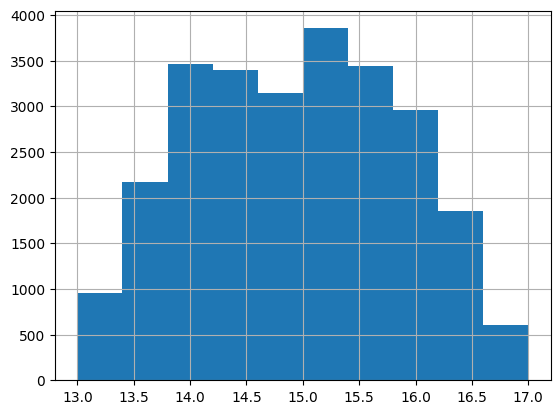

In [5]:
df_processed = df_processed.reset_index(drop=True)
# df_processed[(df_processed['SOG']>13) | (df_processed['SOG']<15) ]['R_added'].hist()
# df_processed[(df_processed['R_added']<100) ]

R_added = df_processed['R_added']
R_mean = R_added.mean()
R_std = R_added.std()
R_cut_off = R_std * 1
age_lower = R_mean - R_cut_off
age_upper = R_mean + R_cut_off
new_data = df_processed[(df_processed['R_added'] > age_lower) & (df_processed['R_added'] < age_upper)]
# new_data = df_processed[~df_processed['R_added'].isin(outliers)].reset_index(drop=True)

# new_data[new_data['R_added']]

new_data['SOG'].hist()
new_data.shape[0]
new_data

### 保留编号1-3的54天数据作为验证集

In [10]:
import pandas as pd

# 读取 predicted_day 和 AIS 数据（你需要用实际的文件路径替换）
predicted_day = pd.read_csv("/workspaces/SFP/validation_data/predicted_day.csv")
ais = pd.read_csv("/workspaces/SFP/Training_data/data_13_17_1_std.csv")

# 确保日期列为 datetime 格式
predicted_day['date'] = pd.to_datetime(predicted_day['date'])
ais['postime'] = pd.to_datetime(ais['postime'])

# 筛选出 predicted_day 中 num 为 1, 2, 3 的数据
nums_to_check = [1, 2, 3]
filtered_predicted_day = predicted_day[predicted_day['num'].isin(nums_to_check)]

# 遍历 AIS 数据，检查是否有匹配的 num 和日期
def should_keep(row, predicted_data):
    for _, predicted_row in predicted_data.iterrows():
        if row['num'] == predicted_row['num'] and row['postime'].date() == predicted_row['date'].date():
            return False  # 匹配则删除
    return True  # 不匹配则保留

# 使用过滤函数
ais_to_keep = ais[ais.apply(lambda row: should_keep(row, filtered_predicted_day), axis=1)]
ais_to_delete = ais[~ais.apply(lambda row: should_keep(row, filtered_predicted_day), axis=1)]

ais_to_keep.to_csv("filtered_AIS.csv", index=False)
ais_to_delete.to_csv("deleted_AIS.csv", index=False)

print("处理完成，过滤后的数据已保存为 train_data_13_17_1_std.csv")


处理完成，过滤后的数据已保存为 train_data_13_17_1_std.csv


In [11]:
predicted_day

,Unnamed: 0,num,date,Fuel_hour
0,0,1,2021-09-23,68.698140
1,1,1,2021-09-29,66.236069
2,2,1,2021-10-02,61.032067
3,3,1,2022-05-04,66.920969
4,4,1,2022-07-10,52.683726
...,...,...,...,...
204,204,13,2023-08-23,46.346964
205,205,13,2023-11-05,67.765046
206,206,13,2023-12-11,57.240912
207,207,13,2024-02-10,59.948772


In [7]:
filtered_ais.shape[0]

25850

In [70]:
# new_data.to_csv('../Training_data/data_13_17_1_std.csv')